In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#getting the data

data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#creating the X and y value for training and testing

X=data.iloc[:,2:4].values

y=data.iloc[:,-1].values

In [4]:
#for train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [5]:
# we can see there's a huge difference between age and salary value, which will create problem in my prediction. So to solve it, we use Standard scaler to bring time to close values

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
X_train=scaler.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X_test=scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
#finding k values

In [10]:
#using sqrt method

In [11]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [12]:
k=17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [14]:
# Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [15]:

y_pred=knn.predict(X_test)

In [16]:
#accuracy of my model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875

In [17]:
#next method

In [18]:
#trial and error method

In [20]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train))
    y=confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

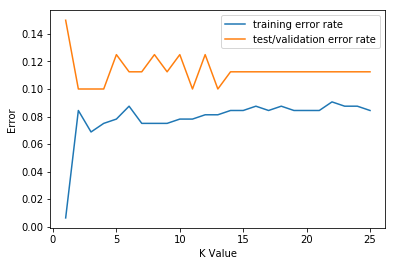

In [21]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

In [22]:
# we can see at around k = 11 the error rate is low

In [35]:

knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [36]:
y_pred=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.9

In [38]:
# prediction according to user input

In [39]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [40]:
predict_output()

Enter the age22
Enter the salary22000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'Will not purchase'

# 1. Decision Boundary for Knn


# 1. What is Decision Boundary


# In a classification problem with two or more classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two or more sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.


# Important Points


# (1) We can draw decision boundary for all the classification algorithms including Neural networks. (2) Decision boundary can be both linear(as in the case of SVM) or non-linear(as in the case of Decision tree classifier or Knn). (3) Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous. (4) For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)

In [41]:
#3. Steps to plot Decision Boundary for Knn(Assuming 2 input cols)

#Train the classifier on the training set.
#Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.
#Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i, column j on the grid.
#Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.
#Finally print out the training data with their respective color on the same contour

In [42]:
#first stage is done i.e training

In [43]:
#creating a mesh grid

In [44]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

In [45]:
#now classifying every point on the mesh grid

In [46]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [47]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
#plotting the array as an image

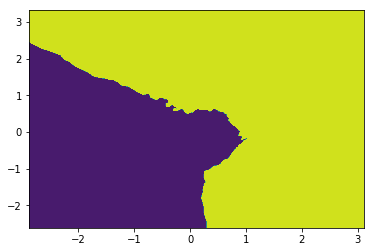

In [49]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

In [50]:
#plotting al the training data on the plot

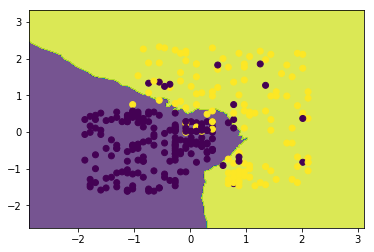

In [51]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)